https://docs.opencv.org/3.4/d8/d83/tutorial_py_grabcut.html

- We will see GrabCut algorithm to extract foreground in images
- We will create an interactive application for this.

 An algorithm was needed for foreground extraction with minimal user interaction, and the result was GrabCut.

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [29]:
img = cv2.imread('messi.jpg')
mask = np.zeros(img.shape[:2], np.uint8)

In [30]:
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)

왜 bgd_model 로 변수를 잡으면 lib내부 C++단에서 에러가 나고
bgdModel로 하면 에러가 안나는걸까

In [31]:
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2]], dtype=uint8),
 array([[2.42955768e-01, 2.29399133e-01, 1.78112708e-01, 1.99797303e-01,
         1.49735089e-01, 5.24219808e+01, 1.40906327e+02, 1.00467908e+02,
         2.85865885e+01, 2.54285027e+01, 2.22553257e+01, 7.99113803e+01,
         7.99716056e+01, 8.97262535e+01, 5.29246648e+01, 5.04354879e+01,
         5.24628597e+01, 1.22098110e+02, 1.19676250e+02, 1.09070969e+02,
         1.75439353e+02, 6.26723547e+01, 9.04205096e+01, 6.26723547e+01,
         1.82876902e+02, 1.25927029e+02, 9.04205096e+01, 1.25927029e+02,
         2.31878162e+02, 8.90535781e+01, 8.07286549e+01, 7.89615976e+01,
         8.07286549e+01, 7.87417168e+01, 7.83344049e+01, 7.89615976e+01,
         7.83344049e+01, 8.61274076e+01, 2.20838625e+02, 1.78782498e+02,
         1.16996811e+02, 1.78782498e+02, 2.6

In [32]:
mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
img = img * mask2[:,:,np.newaxis]

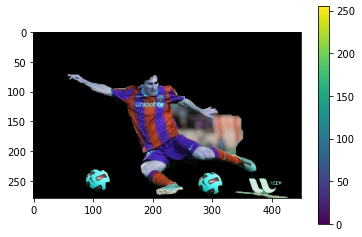

(<matplotlib.image.AxesImage at 0x17ca03e41f0>,
 None)

In [33]:
plt.imshow(img), plt.colorbar(), plt.show()

메시의 머리가 날아갔다,   
  
So we will give there a fine touchup with 1-pixel (sure foreground).   
  
At the same time, Some part of ground has come to picture which we don't want, and also some logo.  
  
We need to remove them. There we give some 0-pixel touchup (sure background).  
  
So we modify our resulting mask in previous case as we told now.  

What I actually did is that, I opened input image in paint application and added another layer to the image.   
Using brush tool in the paint, I marked missed foreground (hair, shoes, ball etc) with white and unwanted background (like logo, ground etc) with black on this new layer.   
  
Then filled remaining background with gray.   
Then loaded that mask image in OpenCV, edited original mask image we got with corresponding values in newly added mask image.   
Check the code below:

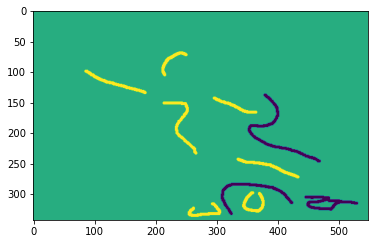

In [37]:
#수작업으로 라벨한 새 마스크를 만들어본다
newmask = cv2.imread('newmask2.png',0)
plt.imshow(newmask)

In [41]:
#whereever it is marked white (sure foreground), change mask = 1
#wherever it is makred balck (sure background), change mask = 0
mask[newmask is 0] = 0
mask[newmask is 255] = 1

<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-41-799b3edca46e>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  mask[newmask is 0] = 0
<ipython-input-41-799b3edca46e>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  mask[newmask is 255] = 1


In [44]:
mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

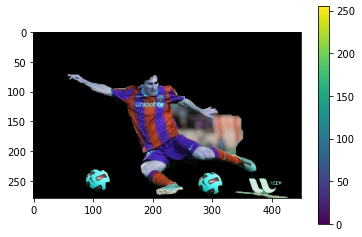

(<matplotlib.image.AxesImage at 0x17ca05bfaf0>,
 None)

In [45]:
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

글쎄요... 실험을 똑같이 따라했는데 어디서 문제인지 모르겠다.

게다가 grabcut에서 이상한 부분에서 에러가 나질 않나...(bgd_model로 하면 실행이 안되는 부분?)

grabCut은 당장 급한건 아니니 넘어가도록 한다.